In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

qualifying = pd.read_csv('qualifying.csv', encoding="utf-8")
results = pd.read_csv('results.csv', encoding="utf-8")

qualifying.head()


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [8]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [11]:
my_quali = pd.merge(qualifying, results, on=['raceId', 'driverId', 'constructorId'], how = 'left')
my_quali.rename(columns = {'milliseconds': 'race_time'}, inplace = True)
my_quali.head()

,qualifyId,raceId,driverId,constructorId,number_x,position_x,q1,q2,q3,resultId,...,positionOrder,points,laps,time,race_time,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714,1.0,...,1.0,10.0,58.0,1:34:50.616,5690616,39,2,1:27.452,218.300,1.0
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869,9.0,...,9.0,0.0,47.0,\N,\N,15,9,1:28.753,215.100,4.0
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079,5.0,...,5.0,4.0,58.0,+18.014,5708630,43,1,1:27.418,218.385,1.0
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178,13.0,...,13.0,0.0,29.0,\N,\N,23,6,1:28.175,216.510,5.0
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236,2.0,...,2.0,8.0,58.0,+5.478,5696094,41,3,1:27.739,217.586,1.0


In [13]:
# retain only the columns we need 
selected_columns = ['raceId', 'driverId', 'constructorId', 'q1', 'q2', 'q3', 'race_time', 'grid', 'position_x']
my_quali2 = my_quali[selected_columns]

my_quali2.head()

,raceId,driverId,constructorId,q1,q2,q3,race_time,grid,position_x
0,18,1,1,1:26.572,1:25.187,1:26.714,5690616,1.0,1
1,18,9,2,1:26.103,1:25.315,1:26.869,\N,2.0,2
2,18,5,1,1:25.664,1:25.452,1:27.079,5708630,3.0,3
3,18,13,6,1:25.994,1:25.691,1:27.178,\N,4.0,4
4,18,2,2,1:25.960,1:25.518,1:27.236,5696094,5.0,5


In [14]:
# remove missing values
my_quali2.replace('\\N', np.nan, inplace=True)
my_quali2.dropna(inplace=True)
my_quali2.head()

/var/folders/zj/rx7n4ybx1ml9886cdbwv429m0000gn/T/ipykernel_16257/1497259285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_quali2.replace('\\N', np.nan, inplace=True)
/var/folders/zj/rx7n4ybx1ml9886cdbwv429m0000gn/T/ipykernel_16257/1497259285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_quali2.dropna(inplace=True)


,raceId,driverId,constructorId,q1,q2,q3,race_time,grid,position_x
0,18,1,1,1:26.572,1:25.187,1:26.714,5690616,1.0,1
2,18,5,1,1:25.664,1:25.452,1:27.079,5708630,3.0,3
4,18,2,2,1:25.960,1:25.518,1:27.236,5696094,5.0,5
6,18,3,3,1:26.295,1:26.059,1:28.687,5698779,7.0,7
23,19,8,6,1:35.645,1:34.188,1:36.230,5478555,2.0,2


In [15]:
# need to convert the q1, q2, and q3 times to milliseconds because we can't analyze them in the current  format

def time_format(time_str):
    # Check if the input is a string
    if not isinstance(time_str, str):
        return None

    # Check if both ":" and "." are present in the string
    if ':' in time_str and '.' in time_str:
        minutes, rest = time_str.split(':')
        seconds, milliseconds = rest.split('.')
        total_milliseconds = int(minutes) * 60000 + int(seconds) * 1000 + int(milliseconds)
    else:
        # Return NaN or a placeholder value for rows that don't match the expected format
        total_milliseconds = None
    return total_milliseconds




In [17]:
# Convert columns to milliseconds
my_quali2.loc[:, 'q1'] = my_quali2['q1'].apply(time_format)
my_quali2.loc[:, 'q2'] = my_quali2['q2'].apply(time_format)
my_quali2.loc[:, 'q3'] = my_quali2['q3'].apply(time_format)

my_quali2.head()

,raceId,driverId,constructorId,q1,q2,q3,race_time,grid,position_x
0,18,1,1,None,None,None,5690616,1.0,1
2,18,5,1,None,None,None,5708630,3.0,3
4,18,2,2,None,None,None,5696094,5.0,5
6,18,3,3,None,None,None,5698779,7.0,7
23,19,8,6,None,None,None,5478555,2.0,2


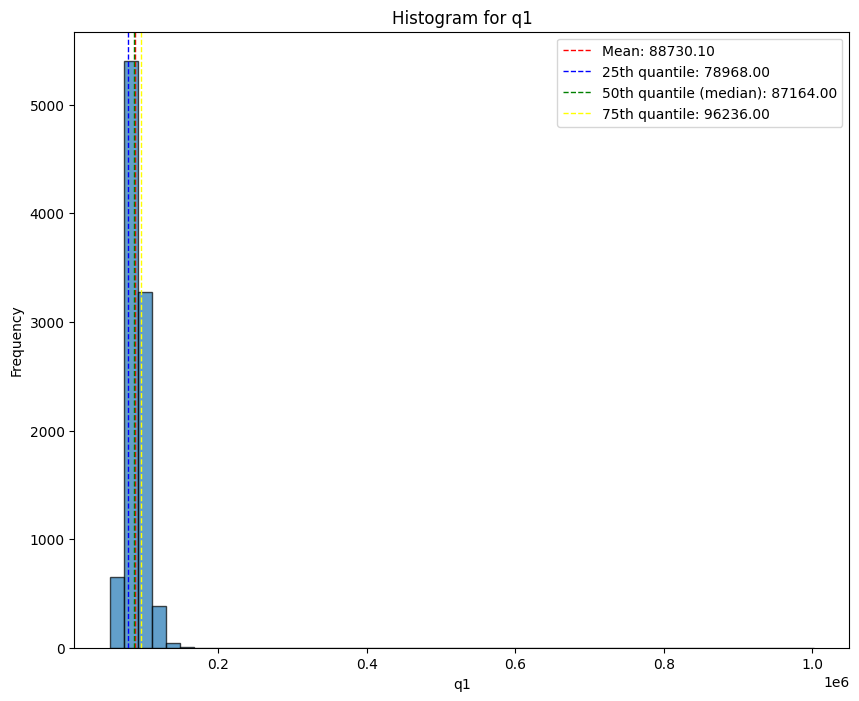

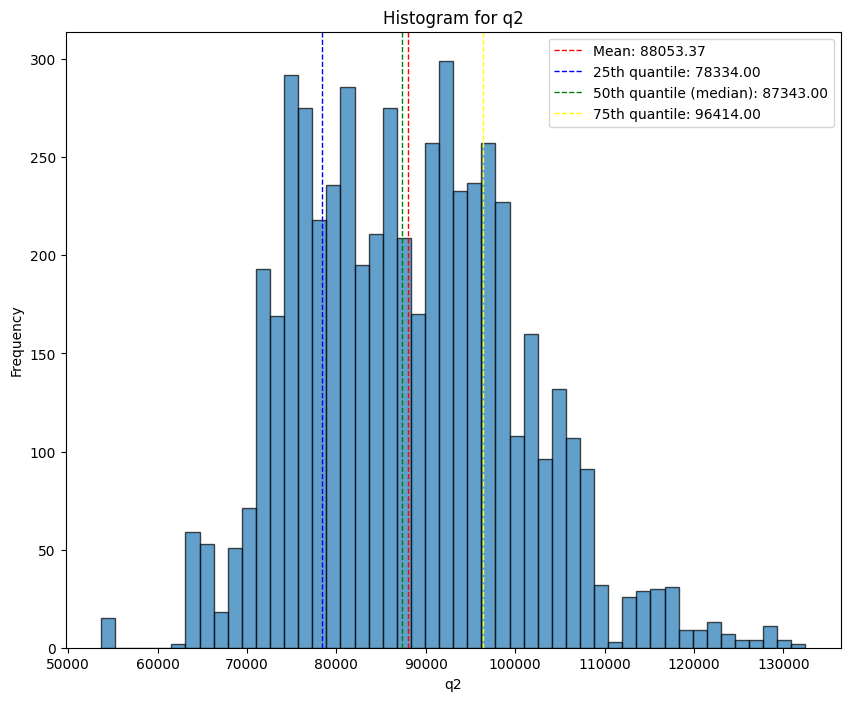

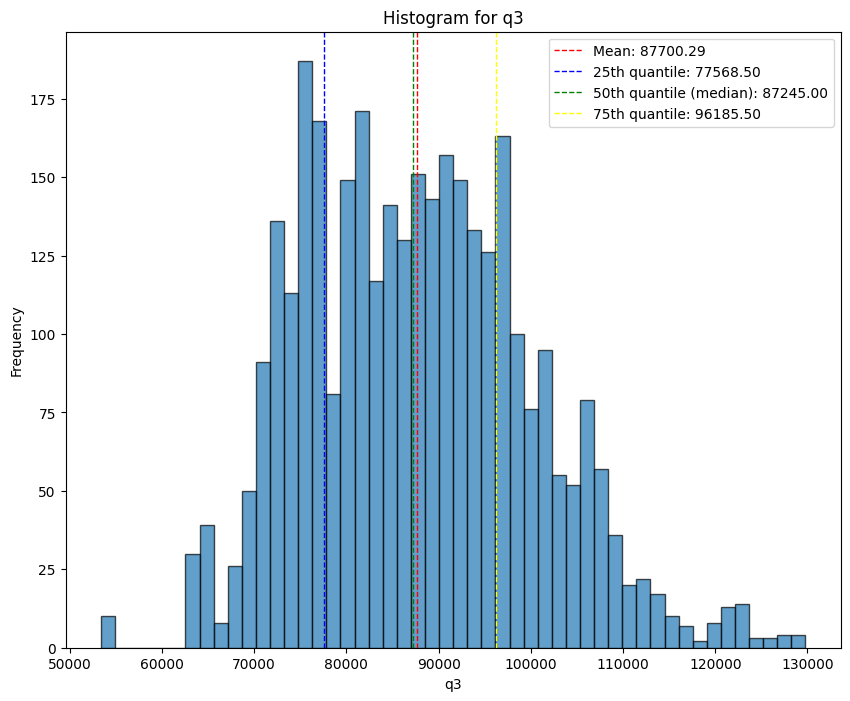

In [5]:
import import_ipynb
from Pitstops import plot_histograms

result = plot_histograms(qualifying, exclude_columns=['raceId', 'driverId', 'qualifyId', 'constructorId', 'position', 'number'])

In [ ]:
qualifying.describe()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
count,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9915.000000,9.765000e+03,5416.000000,3346.000000
mean,4970.529198,595.086737,318.968734,45.295108,18.225819,11.237418,8.873010e+04,88053.371492,87700.285117
std,2876.998807,422.325713,382.730479,71.219331,17.954680,6.285995,1.558927e+04,12162.988642,12329.912553
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.390400e+04,53647.000000,53377.000000
25%,2480.500000,121.000000,16.000000,4.000000,7.000000,6.000000,7.896800e+04,78334.000000,77568.500000
50%,4960.000000,858.000000,51.000000,9.000000,14.000000,11.000000,8.716400e+04,87343.000000,87245.000000
75%,7458.500000,984.000000,819.000000,28.000000,22.000000,16.000000,9.623600e+04,96414.000000,96185.500000
max,9972.000000,1115.000000,859.000000,214.000000,99.000000,28.000000,1.002640e+06,132470.000000,129776.000000
